In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
!ls ../data

borsa.mp4	  scacchiera.mp4	    tavolo_accappatoio.mp4
fuori_casa.mp4	  taratura.mp4		    tavolo_cucina.mp4
scacchiera_5_low  tavolo_accappatoio_5_low


In [33]:
FILE = '../data/scacchiera_5_low/positions.csv'
WORKSPACE = '../data/scacchiera_5_low'

In [34]:
positions = pd.read_csv(FILE)
diff = positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']].diff()
relative_to_first_frame = positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']] - positions[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw', 'tx', 'ty', 'tz']].iloc[0]

In [66]:
real = positions[['x', 'y', 'z']][1:10]
predicted = real.apply(lambda x: x + np.random.rand(1)[0])
#diff_predicted = diff.apply(lambda x:

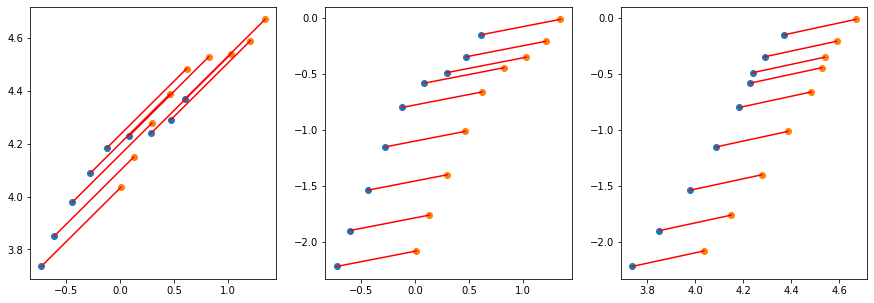

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(real['x'], real['y'])
ax[0].scatter(predicted['x'], predicted['y'])
for p1r, p2r, p1p, p2p in zip(real['x'], real['y'], predicted['x'], predicted['y']):
    ax[0].plot([p1r, p1p], [p2r,p2p], 'r-')
ax[1].scatter(real['x'], real['z'])
ax[1].scatter(predicted['x'], predicted['z'])
for p1r, p2r, p1p, p2p in zip(real['x'], real['z'], predicted['x'], predicted['z']):
    ax[1].plot([p1r, p1p], [p2r,p2p], 'r-')
ax[2].scatter(real['y'], real['z'])
ax[2].scatter(predicted['y'], predicted['z'])
for p1r, p2r, p1p, p2p in zip(real['y'], real['z'], predicted['y'], predicted['z']):
    ax[2].plot([p1r, p1p], [p2r,p2p], 'r-')
plt.show()

In [61]:
len(positions)

233